<a href="https://colab.research.google.com/github/r2klabs/CS430Repository/blob/main/MachineLearningAssignmentTemplate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Machine Learning Assignment 2
# Kadin McWilliams
# CS 430
# Machine Learning in the Cloud


## Standard Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Imports for specific models
In this section, you will import the models from SKLearn that you will use this in this notebook.

In [3]:
# imports for Linear Regression
from sklearn.linear_model import LinearRegression
# imports for Logistic Regression
from sklearn.linear_model import LogisticRegression

## Imports for Splitting Data and Building Pipeline


In [68]:
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn import set_config
set_config(display='diagram')

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Imports for Performance Measures

In [123]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve

## Confusion Matrix Function
This function is for creating a graphical version of the confusion matrix.



In [6]:
def plot_cm(y_test, y_pred):
    cm = confusion_matrix(y_test,y_pred)
    fig = plt.figure(figsize=(10,10))
    heatmap = sns.heatmap(cm, annot=True, fmt='.2f', cmap='RdYlGn')
    plt.ylabel('True label')
    plt.xlabel('Predicted Label')

# ROC_Curve Function
This function is for plotting the roc_curve

In [7]:
def plot_roc_curve(fpr,tpr):
  plt.plot(fpr, tpr, linewidth=2)
  plt.plot([0,1],[0,1], 'k--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])

## Linear Regression Problem


### Reading the Data

In [8]:
#importing data
steeldf = pd.read_csv('/content/gdrive/MyDrive/CS 430/MLA 2/Steel_industry_data.csv')
steeldf.head()
#print(steeldf.info())
oldcol = steeldf.columns
oldcol
newcol = ['date', 'usage_kwh', 'lag_react_pwr_kvarh',
       'lead_react_pwr_kvarh', 'CO2(tCO2)',
       'lag_current_pwr', 'lead_current_pwr', 'nsm',
       'week_status', 'day_of_week', 'load_type']
#renaming columns
steeldf.columns = newcol
steeldf.tail(5)


,date,usage_kwh,lag_react_pwr_kvarh,lead_react_pwr_kvarh,CO2(tCO2),lag_current_pwr,lead_current_pwr,nsm,week_status,day_of_week,load_type
35035,31/12/2018 23:00,3.85,4.86,0.00,0.0,62.10,100.00,82800,Weekday,Monday,Light_Load
35036,31/12/2018 23:15,3.74,3.74,0.00,0.0,70.71,100.00,83700,Weekday,Monday,Light_Load
35037,31/12/2018 23:30,3.78,3.17,0.07,0.0,76.62,99.98,84600,Weekday,Monday,Light_Load
35038,31/12/2018 23:45,3.78,3.06,0.11,0.0,77.72,99.96,85500,Weekday,Monday,Light_Load
35039,31/12/2018 00:00,3.67,3.02,0.07,0.0,77.22,99.98,0,Weekday,Monday,Light_Load


In [9]:
steeldf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   date                  35040 non-null  object 
 1   usage_kwh             35040 non-null  float64
 2   lag_react_pwr_kvarh   35040 non-null  float64
 3   lead_react_pwr_kvarh  35040 non-null  float64
 4   CO2(tCO2)             35040 non-null  float64
 5   lag_current_pwr       35040 non-null  float64
 6   lead_current_pwr      35040 non-null  float64
 7   nsm                   35040 non-null  int64  
 8   week_status           35040 non-null  object 
 9   day_of_week           35040 non-null  object 
 10  load_type             35040 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 2.9+ MB


### Statistical and Visual Exploration

In [10]:
# summarizing numerical columns of data
steeldf.describe()

,usage_kwh,lag_react_pwr_kvarh,lead_react_pwr_kvarh,CO2(tCO2),lag_current_pwr,lead_current_pwr,nsm
count,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000
mean,27.386892,13.035384,3.870949,0.011524,80.578056,84.367870,42750.000000
std,33.444380,16.306000,7.424463,0.016151,18.921322,30.456535,24940.534317
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.200000,2.300000,0.000000,0.000000,63.320000,99.700000,21375.000000
50%,4.570000,5.000000,0.000000,0.000000,87.960000,100.000000,42750.000000
75%,51.237500,22.640000,2.090000,0.020000,99.022500,100.000000,64125.000000
max,157.180000,96.910000,27.760000,0.070000,100.000000,100.000000,85500.000000


In [51]:
# Get the counts of the different load types and loading into a df #
load_type_counts = steeldf['load_type'].value_counts()
load_type_counts_df = pd.DataFrame(load_type_counts)
load_type_counts_df.head()
load_type_counts_df['count']

,count
load_type,
Light_Load,18072
Medium_Load,9696
Maximum_Load,7272


Text(0, 0.5, 'Count')

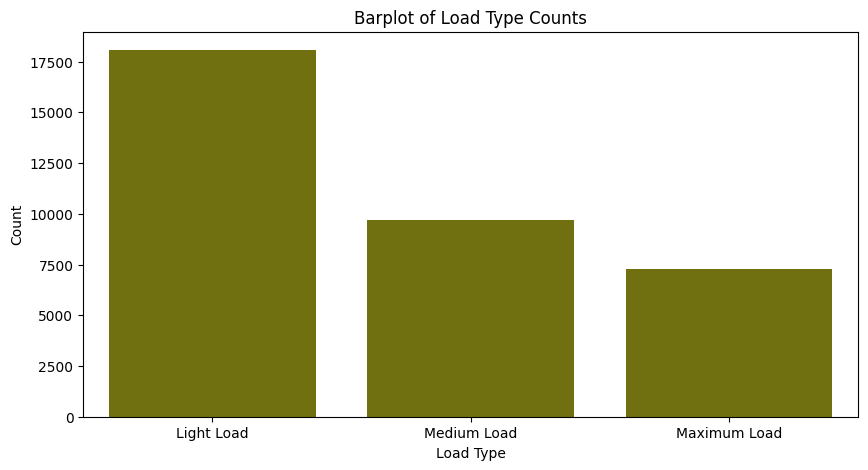

In [64]:
# Create a barplot to view how many days fall under each load type #
plt.figure(figsize=(10,5))
xlabels = ['Light Load','Medium Load','Maximum Load']
sns.barplot(load_type_counts_df['count'], color='olive')
plt.xticks(np.arange(3), xlabels)
plt.title('Barplot of Load Type Counts')
plt.xlabel('Load Type')
plt.ylabel('Count')

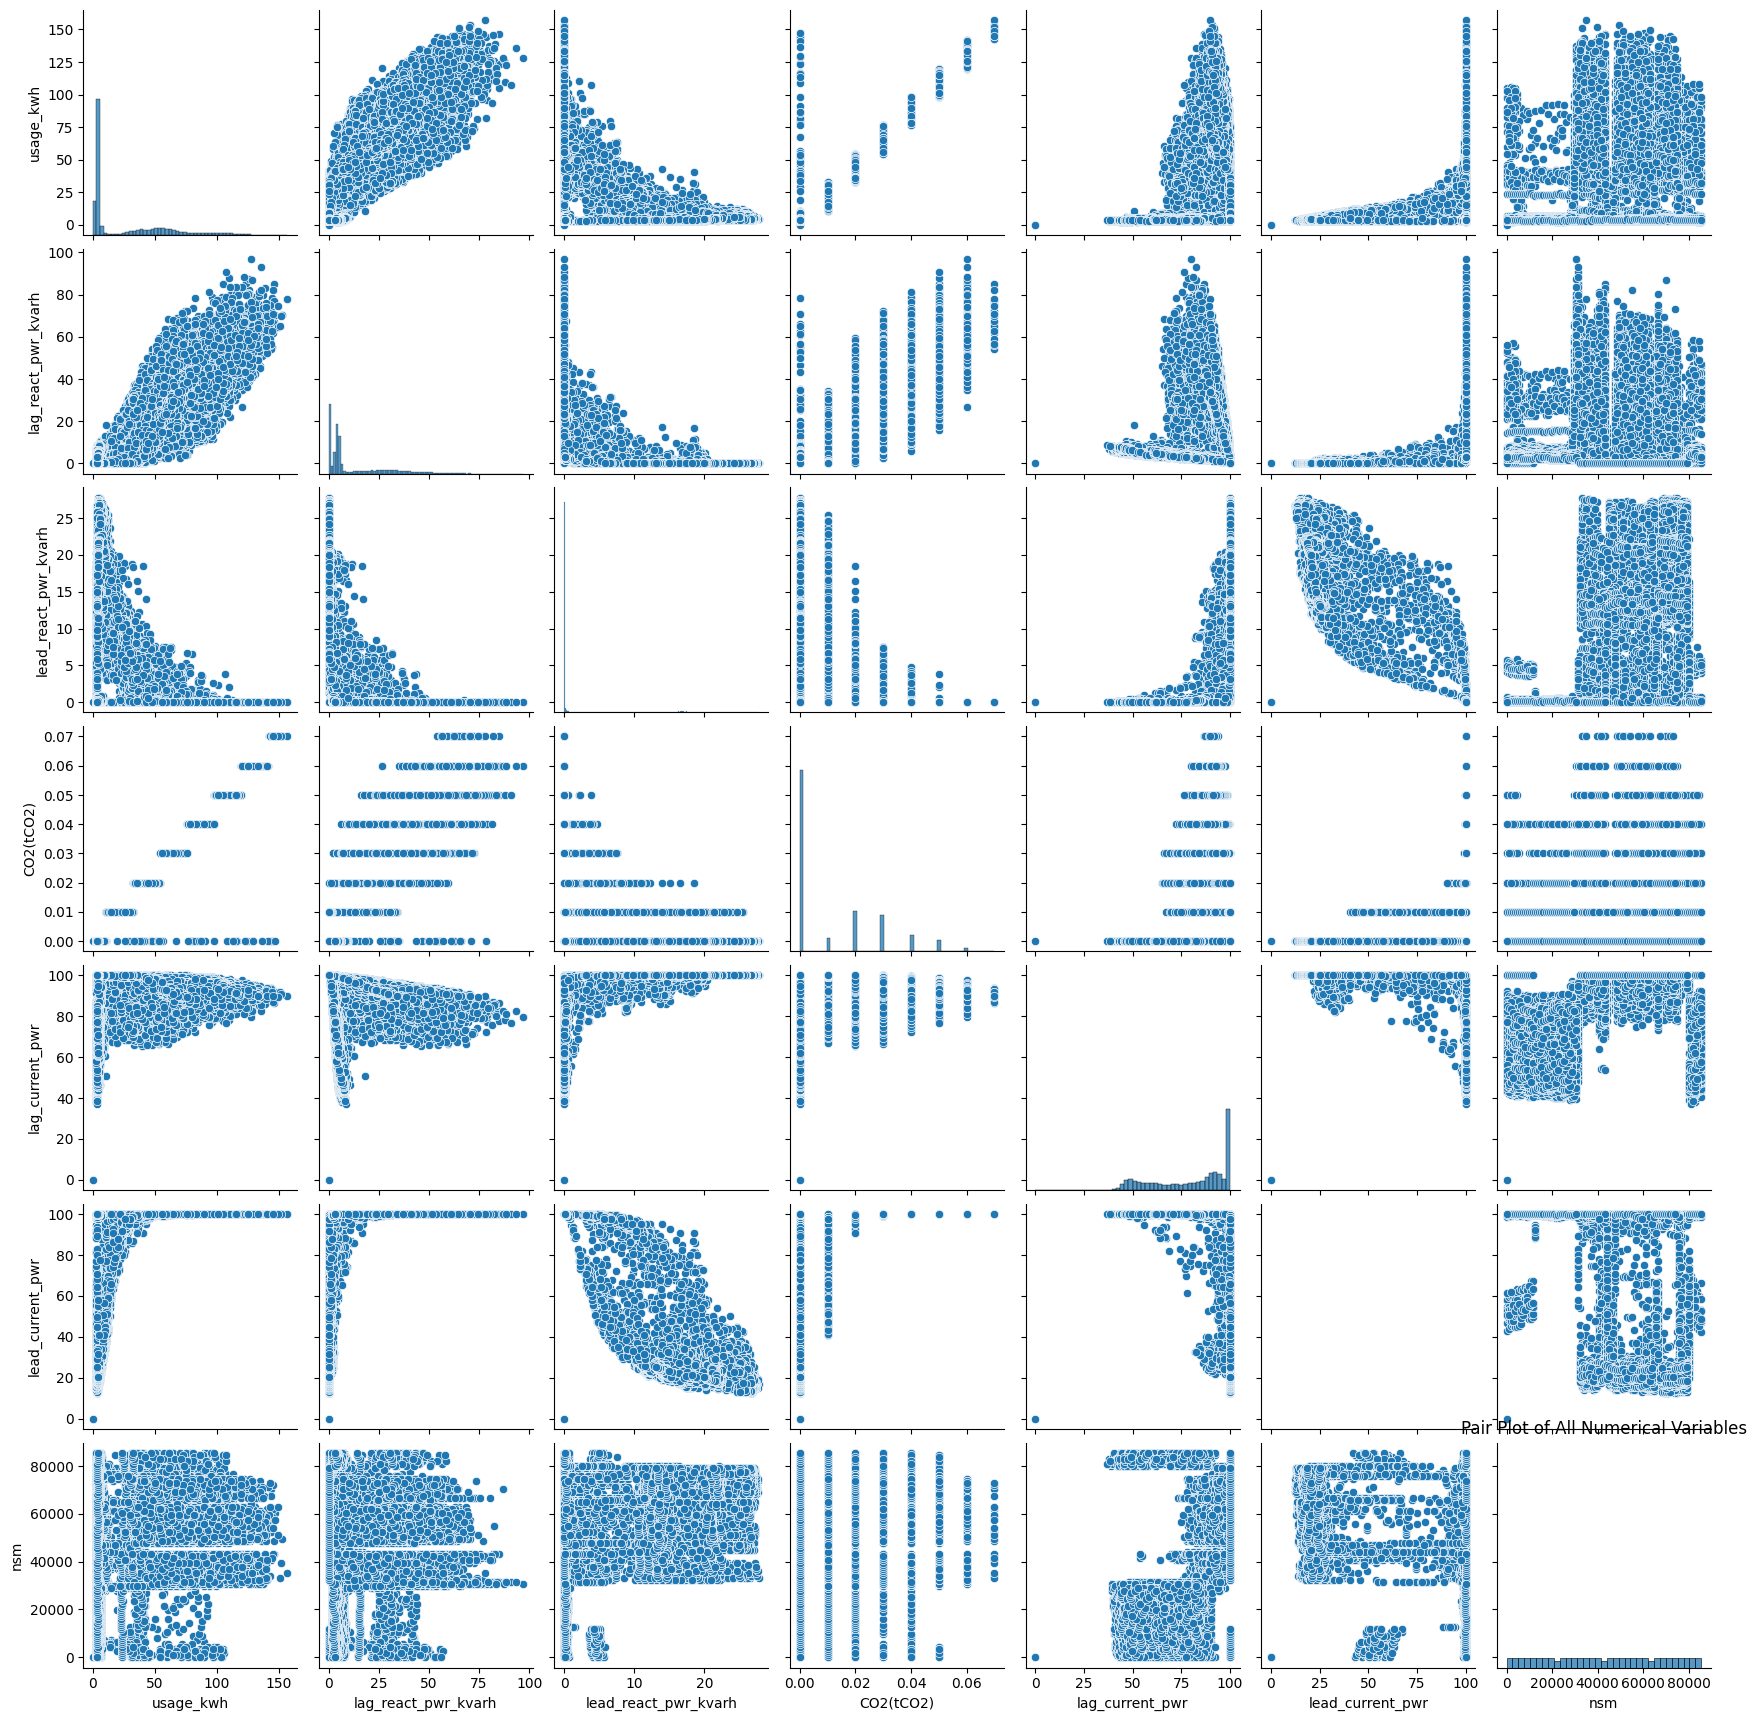

In [32]:
# Create a pairplot of all of the numerical variables using Seaborn.
sns.pairplot(steeldf)
plt.title('Pair Plot of All Numerical Variables')
plt.show()

## Observations
When looking at the pair plot there are a few interesting relationships that can be observed. There seems to be a negative correlation between lead_react_pwr_kvarh and lead_current_pwr. The other notable relationship is between usage_kmh and lag_react_pwr_kvarh and they seem to have a positive correlation between each other. The other variables do not seem to have any notable correlations between each other.

### Splitting Data into Train/Test

In [38]:
# Creating X variable
X = steeldf.drop(['date', 'usage_kwh'], axis=1)
# Creating y varibale
y = steeldf['usage_kwh']
#print(X.head())
#print(y.head())

#creating testing and training variables
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Building the Pipeline

In [75]:
# Create a column transformer that will OneHotEncode the categorical variables and MinMax scale the numerical variables (not the output)

# creating numerical and catagorical variables
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns


# Preprocessing pipeline for numerical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Handle missing values
    ('scaler', MinMaxScaler())  # Standardize features
])

# Preprocessing pipeline for categorical features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Handle missing values
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encoding
])

# Combine preprocessing for both numerical and categorical features
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numerical_features),
    ('cat', categorical_transformer, categorical_features)
])

# Linear Regression Pipeline
linear_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

### Executing the Model

In [76]:
linear_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  Index(['lag_react_pwr_kvarh', 'lead_react_pwr_kvarh', 'CO2(tCO2)',
       'lag_current_pwr', 'lead_current_pwr', 'nsm'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['week_status', 'day_of_week', 'load_type'], dtype='object'))])),
                ('model', LinearRegression())])

### Evaluating Model

In [80]:
# Run the pipeline to predict y values from the test data set and save them in a variable called y_pred.
y_pred = linear_pipeline.predict(X_test)

# Calculate the root mean squared error for both train and test. In a Markdown comment below the result, interpret the output you receive
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 4.224012202014671
R-squared: 0.9843037490428131


## Root Mean Squared Error Evaluation
With a root mean squared error of approximately 4.22, this means that the model is fitted well and has a low margin of error meaning that the model is more likely to correctly guess the correct usage_kwh.


In [83]:
# Calculate the R-squared value of the model (test only)
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

R-squared: 0.9843037490428131


## R2 Score Evaluation
With an R^2 score of approxiamtely 0.98, that means that 98% of the variability in the data set is explained through this model. This means that this would be a great model for prediciting usage_kwh. There is a small room for improvement but this is a very good model.

In [89]:
# Write the code to display the intercept value
print("Intercept:", linear_pipeline.named_steps['model'].intercept_)

# and coefficients of the model.
print("Coefficients:", linear_pipeline.named_steps['model'].coef_)

Intercept: -10.619186112379477
Coefficients: [ 3.17262028e+01  1.96727632e+00  1.15067949e+02  1.21859850e+01
  6.07039277e+00 -2.45728214e-01 -1.39006406e-02  1.39006406e-02
 -1.55506940e-01 -1.36341692e-01 -1.40020893e-01  1.53921534e-01
 -2.19683806e-01  5.72722964e-01 -7.50911673e-02 -1.04700642e+00
  2.77328377e-01  7.69678047e-01]


### Conclusion
When looking at this model as a whole, I would say that it is an extremely good model for predicting usage_kwh. The low RMSE score means that the model will be more accurate especially since it is really close to 0. The R^2 score is also another really good indicatior as 98% of variability can be explained by the model.

## Problem 2

### Reading the Data

In [95]:
#  recode the 'week_status' column so a Weekday is coded as 1 and a Weekend is coded as a 0.
steeldf
steeldf['week_status'] = steeldf['week_status'].replace({'Weekday': 1, 'Weekend': 0})
steeldf.sample(5)

,date,usage_kwh,lag_react_pwr_kvarh,lead_react_pwr_kvarh,CO2(tCO2),lag_current_pwr,lead_current_pwr,nsm,week_status,day_of_week,load_type
29701,06/11/2018 09:30,76.54,45.54,0.00,0.04,85.94,100.00,34200,1,Tuesday,Medium_Load
34246,23/12/2018 17:45,3.67,0.00,14.44,0.00,100.00,24.63,63900,0,Sunday,Light_Load
15567,12/06/2018 04:00,3.10,5.40,0.00,0.00,49.79,100.00,14400,1,Tuesday,Light_Load
21539,13/08/2018 09:00,119.92,59.80,0.00,0.05,89.49,100.00,32400,1,Monday,Light_Load
725,08/01/2018 13:30,76.14,37.66,0.00,0.03,89.63,100.00,48600,1,Monday,Medium_Load


### Splitting Data into Train/Test

In [112]:
# Creating x variable
X = steeldf.drop(['date', 'week_status','day_of_week'], axis=1)
# Creating y varibale
y = steeldf['week_status']
# split the data into Train/Test sets.  Use 20% of the data for testing.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Building the Pipeline

In [113]:
# Create a column transformer that will OneHotEncode the categorical variables and MinMax scale the numerical variables (not the output)

# creating numerical and catagorical variables
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns


# Preprocessing pipeline for numerical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Handle missing values
    ('scaler', MinMaxScaler())  # Standardize features
])

# Preprocessing pipeline for categorical features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Handle missing values
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encoding
])

# Combine preprocessing for both numerical and categorical features
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numerical_features),
    ('cat', categorical_transformer, categorical_features)
])

# Logestic Regression Pipeline
logistic_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LogisticRegression())
])

### Executing the Model

In [114]:
# Executing the Model
logistic_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  Index(['usage_kwh', 'lag_react_pwr_kvarh', 'lead_react_pwr_kvarh', 'CO2(tCO2)',
       'lag_current_pwr', 'lead_current_pwr', 'nsm'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['load_type'], dtype='object'))])),
                ('model', LogisticRegression())])

### Evaluating Model

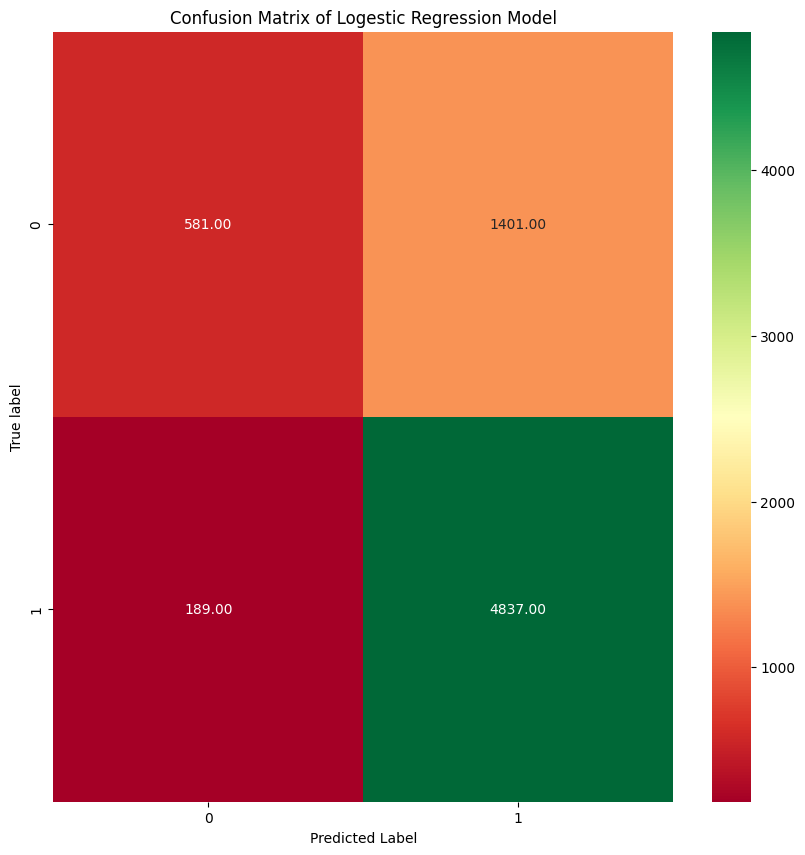

In [117]:
# Run the pipeline to predict y values from the test data set and save them in a variable called y_pred.
y_pred = logistic_pipeline.predict(X_test)

# Call the plot_cm function to generate the confusion matrix.
plot_cm(y_test, y_pred)
plt.title("Confusion Matrix of Logestic Regression Model")
plt.show()

In [122]:
# alculate the precision, recall, and F1 score.
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.29      0.42      1982
           1       0.78      0.96      0.86      5026

    accuracy                           0.77      7008
   macro avg       0.76      0.63      0.64      7008
weighted avg       0.77      0.77      0.74      7008



## Intrepertation of results
Looking at all 3 scores combined this model is not accurate or precise as a whole. The numbers are not terrible but they are not as accurate as I would think would be neccessary for a more practical model. The f1-score is 0.74 which is a lot lower than I would like, meaning the model is more likely to make mistakes.

AUC-ROC Score: 0.63


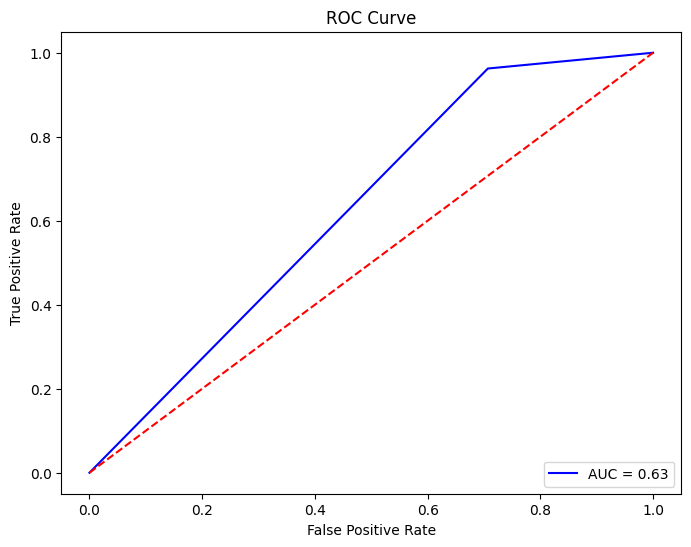

In [129]:
# Generate an ROC Curve

# Compute the Auc score
auc_score = roc_auc_score(y_test, y_pred)

# Compute the ROC curve points
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
print(f"AUC-ROC Score: {auc_score:.2f}")
# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}', color='blue')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

## Intrepretation of Results
I used the ROC curve to see how close the model was to being a perfect model. I thought it would be the most useful in seeing how accurately the model predicts the correct values. This model seems to be extermely poor when looking at the ROC curve and does not seem to be that much different from pure randomness.

### Conclusion
I think that this model is not good at all for predicting week status. The f1-score is way too low for it to have any meaningful application. When also looking at the ROC curve, you will see that the curve is not close to the top of the graph, meaning that there is not much prediciton going on that is accurate. When looking at the confusion matrix, there were a signifigant amount of false positives in the data set. I would not use this model for prediciton.